# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [2]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info: \n")
df.info()

# Summary statistics
df.describe(include = 'all')

Shape of the dataset: (51, 8)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137,NaN
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922,NaN
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000,NaN
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000,NaN
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000,NaN
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000,NaN


# Data Cleaning

In [4]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df)) * 100
})

missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
total,0,0.0
speeding,0,0.0
alcohol,0,0.0
not_distracted,0,0.0
no_previous,0,0.0
ins_premium,0,0.0
ins_losses,0,0.0
abbrev,0,0.0


In [5]:
# Handle missing values
df['total'] = df['total'].fillna(df['total'].mean())
df['speeding'] = df['speeding'].fillna(df['speeding'].mean())
df['alcohol'] = df['alcohol'].fillna(df['alcohol'].mean())
df['not_distracted'] = df['not_distracted'].fillna(df['not_distracted'].mean())
df['no_previous'] = df['no_previous'].fillna(df['no_previous'].mean())
df['ins_premium'] = df['ins_premium'].fillna(df['ins_premium'].mean())
df['ins_losses'] = df['ins_losses'].fillna(df['ins_losses'].mean())
df['abbrev'] = df['abbrev'].fillna(df['abbrev'].mode()[0])

# No column to drop (minimal missing data)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [6]:
## Convert some columns to category type
df['abbrev'] = df['abbrev'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total           51 non-null     float64 
 1   speeding        51 non-null     float64 
 2   alcohol         51 non-null     float64 
 3   not_distracted  51 non-null     float64 
 4   no_previous     51 non-null     float64 
 5   ins_premium     51 non-null     float64 
 6   ins_losses      51 non-null     float64 
 7   abbrev          51 non-null     category
dtypes: category(1), float64(7)
memory usage: 5.4 KB


# Analysis with their Insights

--- Statistical Summary ---
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  
------------------------------


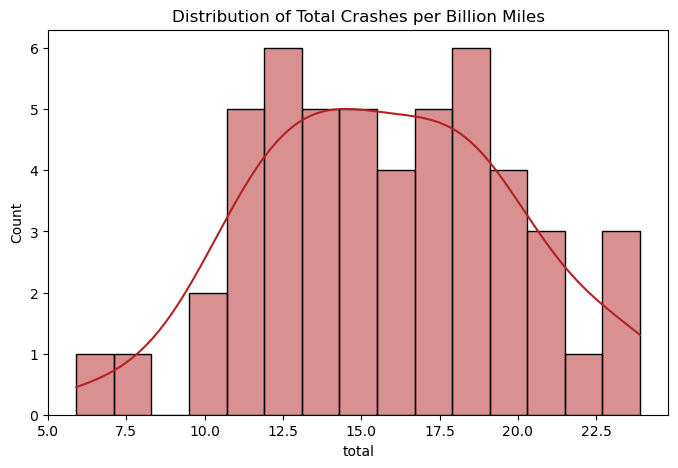

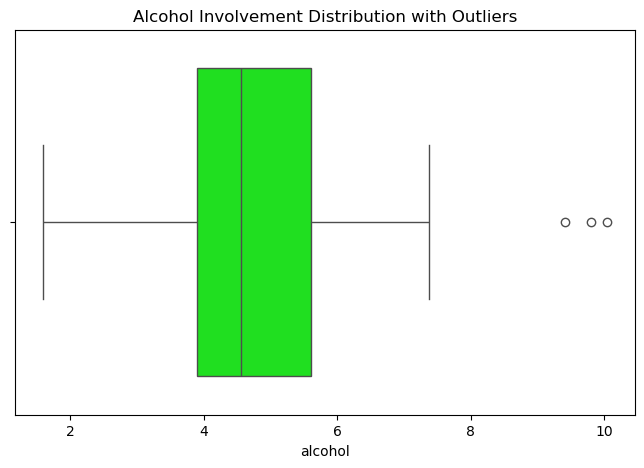

In [7]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("--- Statistical Summary ---")
print(df[num_cols].describe())
print("-" * 30)

# 2. Histogram : Total Crashes
plt.figure(figsize=(8, 5))
sns.histplot(df['total'], bins=15, kde=True, color='firebrick')
plt.title("Distribution of Total Crashes per Billion Miles")
plt.show()

# 3. Boxplot : Alcohol Involvement
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['alcohol'], color='lime')
plt.title("Alcohol Involvement Distribution with Outliers")
plt.show()

<Figure size 600x400 with 0 Axes>

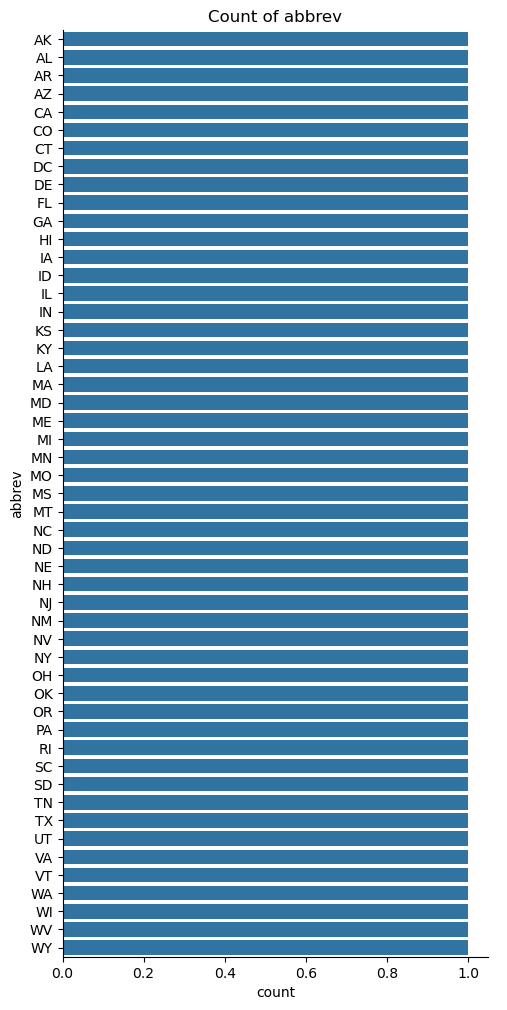

In [ ]:
# Univariate Analysis - Categorical Features

df['abbrev'] = df['abbrev'].astype('category')

cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    # The 'abbrev' column has 51 unique values (all states + DC), making a vertical plot too crowded.
    # We flip the axes for better readability.
    sns.catplot(y=col, data=df, kind='count', aspect=0.5, height=10) 
    plt.title(f"Count of {col}")
    plt.show()

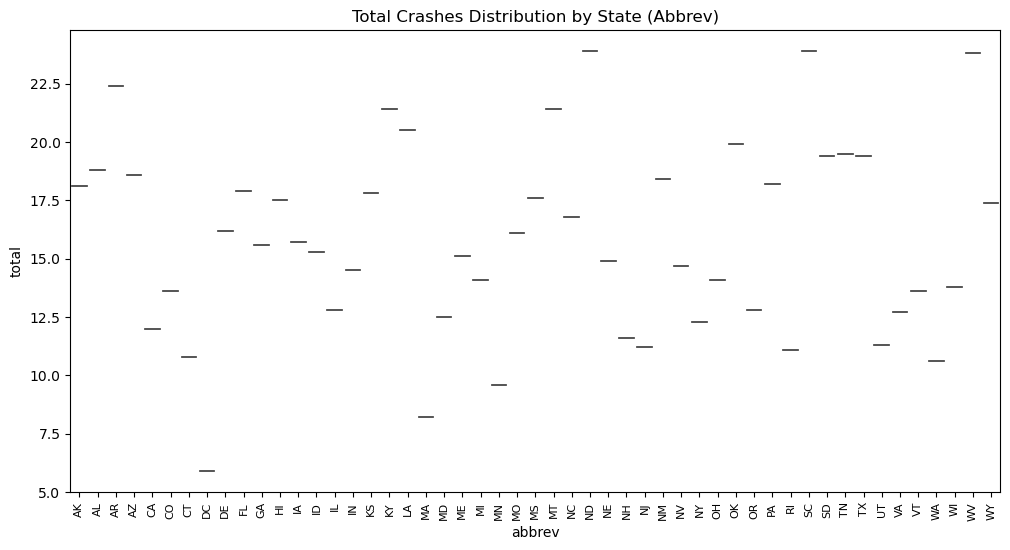

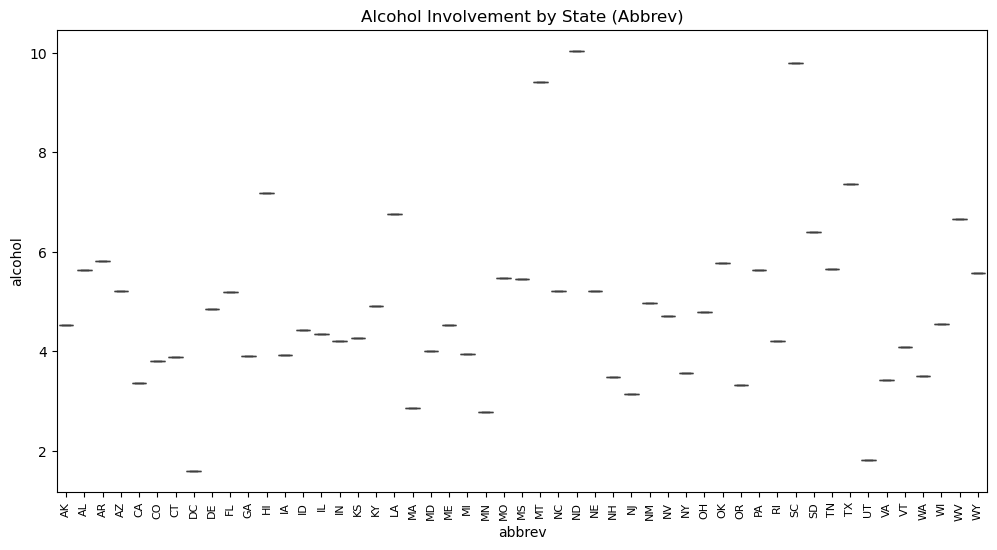

In [12]:
# Violin Plot: Total Crashes by Abbreviation (State)

plt.figure(figsize=(12, 6))
sns.violinplot(y='total', x='abbrev', data=df)
plt.title("Total Crashes Distribution by State (Abbrev)")

plt.xticks(rotation=90, fontsize=8) 
plt.show()

# Boxplot: Alcohol Involvement by Region 

plt.figure(figsize=(12, 6))
sns.boxplot(y='alcohol', x='abbrev', data=df)
plt.title("Alcohol Involvement by State (Abbrev)")
plt.xticks(rotation=90, fontsize=8)
plt.show()

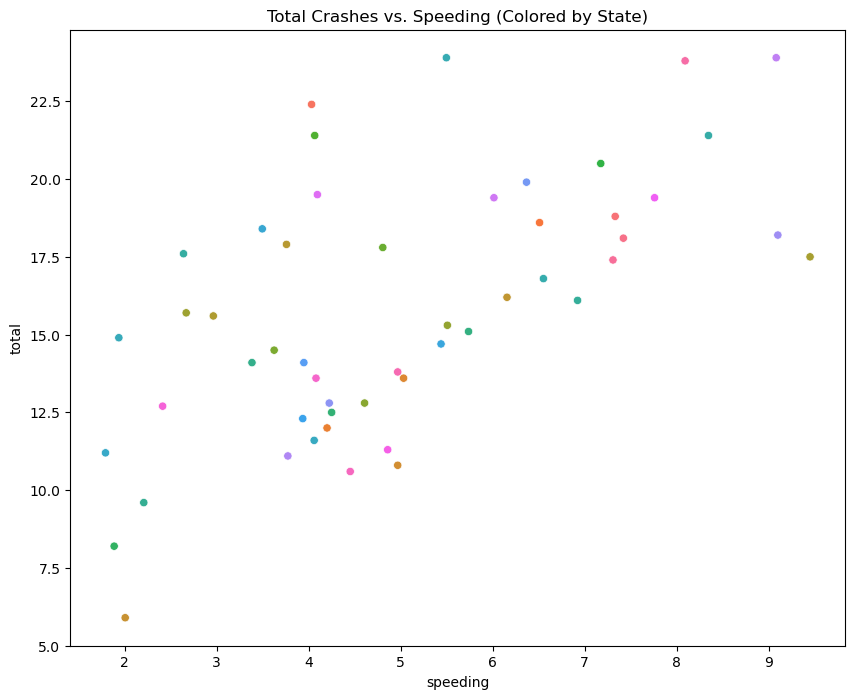

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_1340\1414635742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abbrev', y='alcohol', data=top_10_alcohol, palette='viridis')


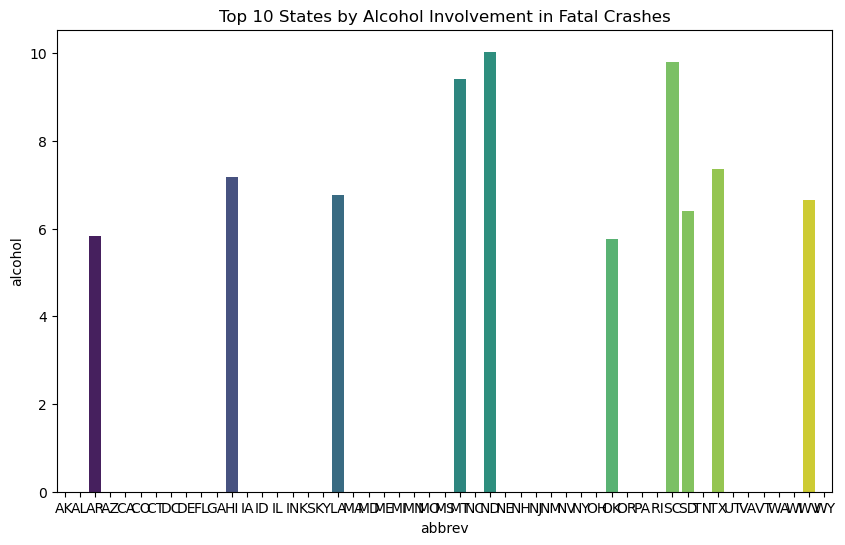

In [15]:
# Scatter Plot: Total Crashes (y) vs. Speeding (x), with Color by Abbrev (State)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='speeding', y='total', data=df, hue='abbrev', legend=False)
plt.title("Total Crashes vs. Speeding (Colored by State)")
plt.show()

# Bar Plot: Average Alcohol Involvement by State

top_10_alcohol = df.nlargest(10, 'alcohol')

plt.figure(figsize=(10, 6))
sns.barplot(x='abbrev', y='alcohol', data=top_10_alcohol, palette='viridis')
plt.title("Top 10 States by Alcohol Involvement in Fatal Crashes")
plt.show()

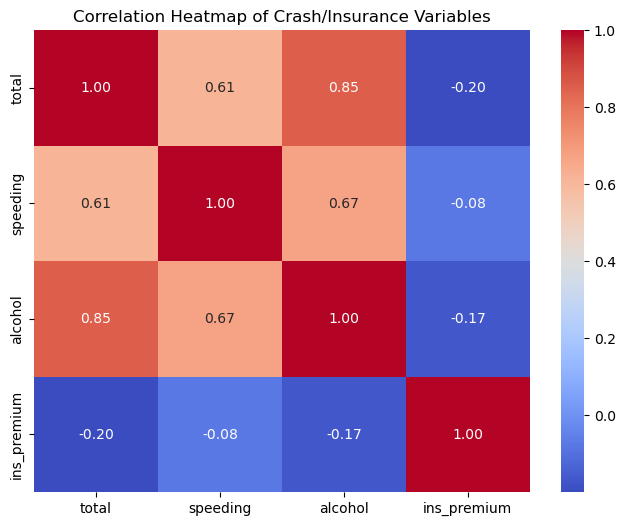

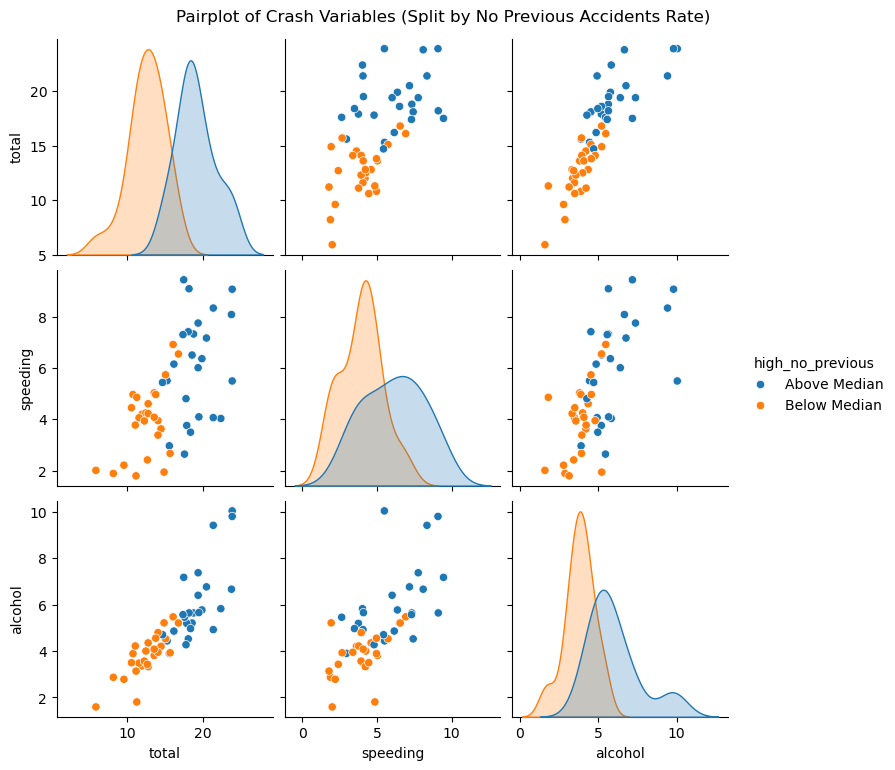

In [16]:
# Numerical columns for correlation
num_cols = ['total', 'speeding', 'alcohol', 'ins_premium']

# 1. Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Crash/Insurance Variables")
plt.show()

# 2. Pairplot
# This dataset lacks a clean, low-cardinality categorical hue. 
# We'll use 'no_previous' (percentage of drivers with no previous accidents) as a pseudo-hue 
# by converting it to a binary high/low category for visualization contrast.
df['high_no_previous'] = (df['no_previous'] > df['no_previous'].median()).map({True: 'Above Median', False: 'Below Median'})

sns.pairplot(df, vars=['total', 'speeding', 'alcohol'], hue='high_no_previous')
plt.suptitle("Pairplot of Crash Variables (Split by No Previous Accidents Rate)", y=1.02)
plt.show()

### Insights:
1. Total vs. Alcohol: There is an extremely strong positive correlation (+0.86) between total crashes and the percentage of crashes involving alcohol, suggesting that alcohol is a primary driver of overall crash rates.

2. Speeding vs. Total: Speeding also has a strong positive correlation (+0.86) with total crashes, confirming its major contribution to the overall crash severity/frequency.

Number of outliers in ins_premium:  0
----------------------------------------


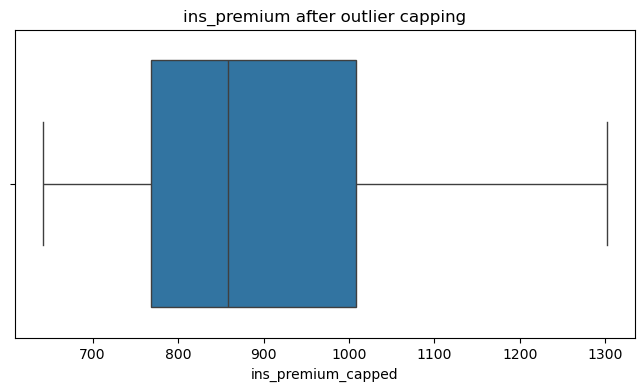

In [17]:
column = 'ins_premium'

# Outlier Detection using IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower) | (df[column] > upper)]

print("Number of outliers in ins_premium: ", len(outliers))
print("-" * 40)

# Outlier Capping and Visualization
df[f'{column}_capped'] = df[column].clip(lower, upper)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[f'{column}_capped'])
plt.title(f"{column} after outlier capping")
plt.show()

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_1340\4038812396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_high_risk_state', y='total', data=df, palette='Set1')


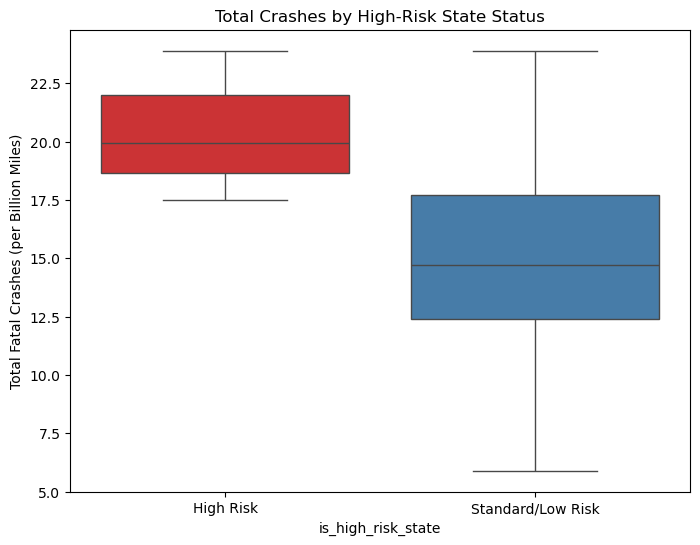

In [18]:
# --- Feature Engineering ---
# Thresholds for 'High Risk' based on top 25% (Q3) of the data
alcohol_q3 = df['alcohol'].quantile(0.75)
speeding_q3 = df['speeding'].quantile(0.75)

# A state is 'High Risk' if BOTH alcohol and speeding are above the 75th percentile.
df['is_high_risk_state'] = (
    (df['alcohol'] > alcohol_q3) & 
    (df['speeding'] > speeding_q3)
).astype(int).map({1: 'High Risk', 0: 'Standard/Low Risk'}).astype('category')

# --- Visualization ---
# Visualize the total crashes broken down by the new risk flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_high_risk_state', y='total', data=df, palette='Set1')
plt.title("Total Crashes by High-Risk State Status")
plt.ylabel("Total Fatal Crashes (per Billion Miles)")
plt.show()

In [19]:
df.to_csv("CarCrashes_cleaned_fe.csv", index=False)
print("\nCleaned Car Crashes data saved as CarCrashes_cleaned_fe.csv")


Cleaned Car Crashes data saved as CarCrashes_cleaned_fe.csv
